In [3]:
import json
import pandas as pd

In [12]:
with open("albums_0-999.json", 'r') as json_file:
    data = json.load(json_file)

In [13]:
data['6vV5UrXcfyQD1wu4Qo2I9K'].keys()

dict_keys(['album_type', 'artists', 'available_markets', 'copyrights', 'external_ids', 'external_urls', 'genres', 'href', 'id', 'images', 'label', 'name', 'popularity', 'release_date', 'release_date_precision', 'total_tracks', 'tracks', 'type', 'uri'])

In [4]:
df = pd.read_csv('songs.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34441 entries, 0 to 34440
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         34441 non-null  int64 
 1   album              34441 non-null  object
 2   artists            34441 non-null  object
 3   available_markets  34441 non-null  object
 4   duration_ms        34441 non-null  int64 
 5   explicit           34441 non-null  bool  
 6   external_ids       34441 non-null  object
 7   href               34441 non-null  object
 8   id                 34441 non-null  object
 9   name               34423 non-null  object
 10  popularity         34441 non-null  int64 
 11  track_number       34441 non-null  int64 
 12  uri                34441 non-null  object
dtypes: bool(1), int64(4), object(8)
memory usage: 3.2+ MB


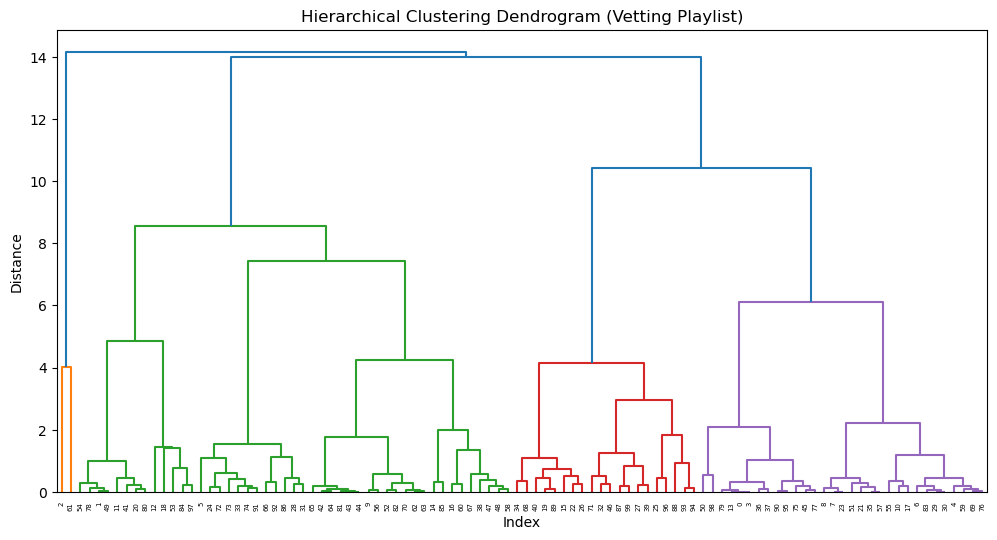

Number of Clusters in Vetting Playlist Dataset: 5
Description of Cluster Most Similar to Ms. Spindt's Vetting Playlist:
       Unnamed: 0    duration_ms  popularity  track_number  album_encoded  \
count   20.000000      20.000000   20.000000      20.00000      20.000000   
mean    55.500000  227781.200000    1.368008       4.35000      -0.661367   
std     31.045807   68512.854106    0.533629       2.83354       0.470461   
min     15.000000  120426.000000    0.631388       1.00000      -1.403873   
25%     26.750000  198689.500000    1.050365       2.00000      -1.030706   
50%     43.000000  223673.000000    1.235494       3.50000      -0.810633   
75%     88.250000  259503.250000    1.576522       6.00000      -0.236530   
max     99.000000  351309.000000    2.580117      12.00000       0.127068   

       artists_encoded  explicit_encoded  cluster  
count        20.000000      2.000000e+01     20.0  
mean         -0.246512     -1.428571e-01      4.0  
std           0.657200      2.

In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the datasets
df_vetting = pd.read_csv('spindtTracks.csv')
df_songs = pd.read_csv('songs.csv')

# Encode categorical features in the Vetting playlist dataset
label_encoder = LabelEncoder()
df_vetting['album_encoded'] = label_encoder.fit_transform(df_vetting['album'])
df_vetting['artists_encoded'] = label_encoder.fit_transform(df_vetting['artists'])
df_vetting['explicit_encoded'] = label_encoder.fit_transform(df_vetting['explicit'])

# Select features for clustering
features_vetting = ['album_encoded', 'artists_encoded', 'explicit_encoded', 'popularity']

# Standardize the features
scaler = StandardScaler()
df_vetting[features_vetting] = scaler.fit_transform(df_vetting[features_vetting])

# Perform hierarchical clustering on Vetting playlist dataset
Z = linkage(df_vetting[features_vetting], method='ward', metric='euclidean')

# Plot dendrogram to determine optimal number of clusters
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Vetting Playlist)')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

# Based on the dendrogram, determine the optimal number of clusters
# For this example, let's choose 5 clusters
num_clusters = 5

# Perform clustering with the chosen number of clusters
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
df_vetting['cluster'] = cluster.fit_predict(df_vetting[features_vetting])

# Find cluster most similar to Ms. Spindt's Vetting playlist
cluster_stats = df_vetting.groupby('cluster')['popularity'].mean()
most_similar_cluster = cluster_stats.idxmax()

# Describe the most similar cluster
cluster_description = df_vetting[df_vetting['cluster'] == most_similar_cluster].describe()

# Select three songs from the most similar cluster in the Vetting playlist dataset
recommended_songs_vetting = df_vetting[df_vetting['cluster'] == most_similar_cluster].sample(3)[['name', 'artists', 'album']]

# Recommend songs from the songs.csv dataset similar to the most similar cluster
similar_songs_ids = df_songs[df_songs['popularity'] > 70].sample(10)['id']  # Example: selecting 10 popular songs
similar_songs = df_songs[df_songs['id'].isin(similar_songs_ids)][['name', 'artists', 'album']]

print("Number of Clusters in Vetting Playlist Dataset:", num_clusters)
print("Description of Cluster Most Similar to Ms. Spindt's Vetting Playlist:")
print(cluster_description)
print("\nThree Song Recommendations for Vetting Playlist:")
print(recommended_songs_vetting)

print("\nRecommended Songs from songs.csv Dataset:")
print(similar_songs)


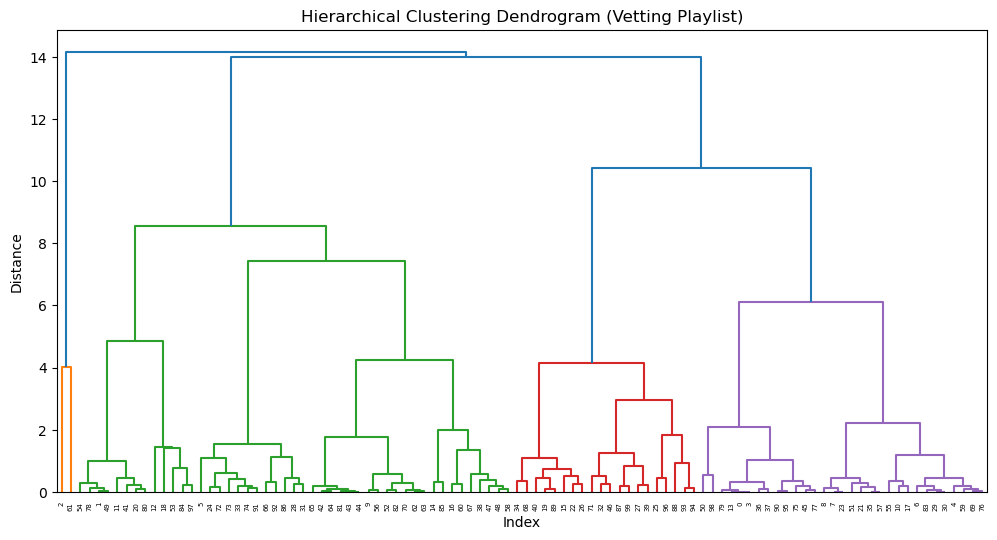

Number of Clusters in Vetting Playlist Dataset: 5
Description of Cluster Most Similar to Ms. Spindt's Vetting Playlist:
       Unnamed: 0    duration_ms  popularity  track_number  album_encoded  \
count   20.000000      20.000000   20.000000      20.00000      20.000000   
mean    55.500000  227781.200000    1.368008       4.35000      -0.661367   
std     31.045807   68512.854106    0.533629       2.83354       0.470461   
min     15.000000  120426.000000    0.631388       1.00000      -1.403873   
25%     26.750000  198689.500000    1.050365       2.00000      -1.030706   
50%     43.000000  223673.000000    1.235494       3.50000      -0.810633   
75%     88.250000  259503.250000    1.576522       6.00000      -0.236530   
max     99.000000  351309.000000    2.580117      12.00000       0.127068   

       artists_encoded  explicit_encoded  cluster  
count        20.000000      2.000000e+01     20.0  
mean         -0.246512     -1.428571e-01      4.0  
std           0.657200      2.

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the datasets
df_vetting = pd.read_csv('spindtTracks.csv')
df_songs = pd.read_csv('songs.csv')
df_artists = pd.read_csv('artists.csv')

# Encode categorical features in the Vetting playlist dataset
label_encoder = LabelEncoder()
df_vetting['album_encoded'] = label_encoder.fit_transform(df_vetting['album'])
df_vetting['artists_encoded'] = label_encoder.fit_transform(df_vetting['artists'])
df_vetting['explicit_encoded'] = label_encoder.fit_transform(df_vetting['explicit'])

# Select features for clustering
features_vetting = ['album_encoded', 'artists_encoded', 'explicit_encoded', 'popularity']

# Standardize the features
scaler = StandardScaler()
df_vetting[features_vetting] = scaler.fit_transform(df_vetting[features_vetting])

# Perform hierarchical clustering on Vetting playlist dataset
Z = linkage(df_vetting[features_vetting], method='ward', metric='euclidean')

# Plot dendrogram to determine optimal number of clusters
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Vetting Playlist)')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

# Based on the dendrogram, determine the optimal number of clusters
# For this example, let's choose 5 clusters
num_clusters = 5

# Perform clustering with the chosen number of clusters
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
df_vetting['cluster'] = cluster.fit_predict(df_vetting[features_vetting])

# Find cluster most similar to Ms. Spindt's Vetting playlist
cluster_stats = df_vetting.groupby('cluster')['popularity'].mean()
most_similar_cluster = cluster_stats.idxmax()

# Describe the most similar cluster
cluster_description = df_vetting[df_vetting['cluster'] == most_similar_cluster].describe()

# Select three songs from the most similar cluster in the Vetting playlist dataset
recommended_songs_vetting = df_vetting[df_vetting['cluster'] == most_similar_cluster].sample(3)[['name', 'artists', 'album']]

# Recommend songs from the songs.csv dataset similar to the most similar cluster
similar_songs_ids = df_songs[df_songs['popularity'] > 70].sample(10)['id']  # Example: selecting 10 popular songs
similar_songs = df_songs[df_songs['id'].isin(similar_songs_ids)][['name', 'artists', 'album']]

# Retrieve artist names for the recommended songs
recommended_artist_names = []
for artist_id in recommended_songs_vetting['artists']:
    matching_artists = df_artists[df_artists['id'] == artist_id]['name'].values
    if len(matching_artists) > 0:
        artist_name = matching_artists[0]
        recommended_artist_names.append(artist_name)
    else:
        recommended_artist_names.append("Unknown Artist")

recommended_songs_vetting['artist_name'] = recommended_artist_names

print("Number of Clusters in Vetting Playlist Dataset:", num_clusters)
print("Description of Cluster Most Similar to Ms. Spindt's Vetting Playlist:")
print(cluster_description)
print("\nThree Song Recommendations for Vetting Playlist:")
print(recommended_songs_vetting)

print("\nRecommended Songs from songs.csv Dataset:")
print(similar_songs)
